In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz

In [3]:
az.style.use("arviz-grayscale")
np.random.seed(314)

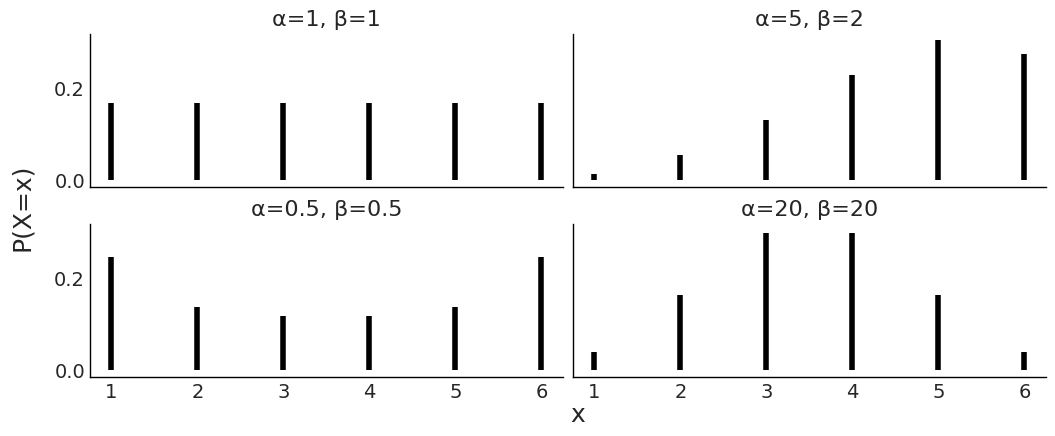

In [3]:
n = 5
x = np.arange(0, 6)

fig, axes = plt.subplots(2, 2, figsize=(10, 4), sharey=True, sharex=True)
axes = np.ravel(axes)

for ax, (α, β) in zip(axes, ((1, 1), (5, 2), (0.5, 0.5), (20, 20))): 
    dist_pmf = binom(n, x) * (beta(x+α, n-x+β) / beta(α, β))
    ax.vlines(x, 0, dist_pmf, colors='C0', lw=4)
    ax.set_title(f"α={α}, β={β}")
    ax.set_xticks(x)
    ax.set_xticklabels(x+1)
fig.text(0.52, -0.04, "x", fontsize=18)
fig.text(-0.04, 0.4, "P(X=x)", fontsize=18, rotation="vertical")
plt.savefig("../fig/dice_distribution.png", bbox_inches='tight')

In [13]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive(pointinterval=False)

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=20.0, min=2.220446049250313e-1…

In [17]:
pmfs = pz.BetaBinomial(alpha=10, beta=10, n=5).pdf(range(6))
[(i, f"{x:0.3f}") for i, x in enumerate(pmfs)]

[(0, '0.047'),
 (1, '0.168'),
 (2, '0.285'),
 (3, '0.285'),
 (4, '0.168'),
 (5, '0.047')]

In [5]:
pz.BetaBinomial(alpha=10, beta=10, n=6).rvs()

4

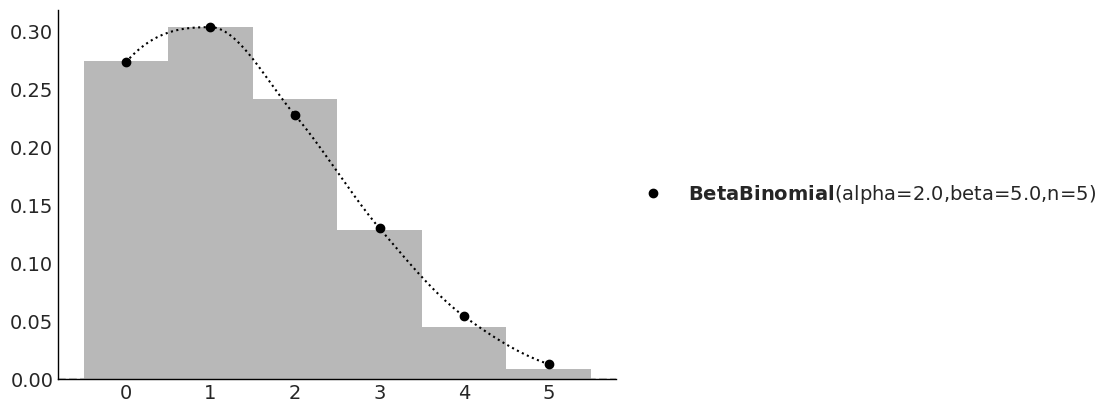

In [6]:
plt.hist(pz.BetaBinomial(alpha=2, beta=5, n=5).rvs(1000),
         bins=[0, 1, 2, 3, 4, 5, 6], density=True, align="left", color="C3")
pz.BetaBinomial(alpha=2, beta=5, n=5).plot_pdf();
plt.savefig("../fig/beta_binomial_sampling.png")

In [89]:
from cycler import cycler
default_cycler = cycler(color=["#000000", "#6a6a6a", "#bebebe", "#2a2eec"])
plt.rc('axes', prop_cycle=default_cycler)

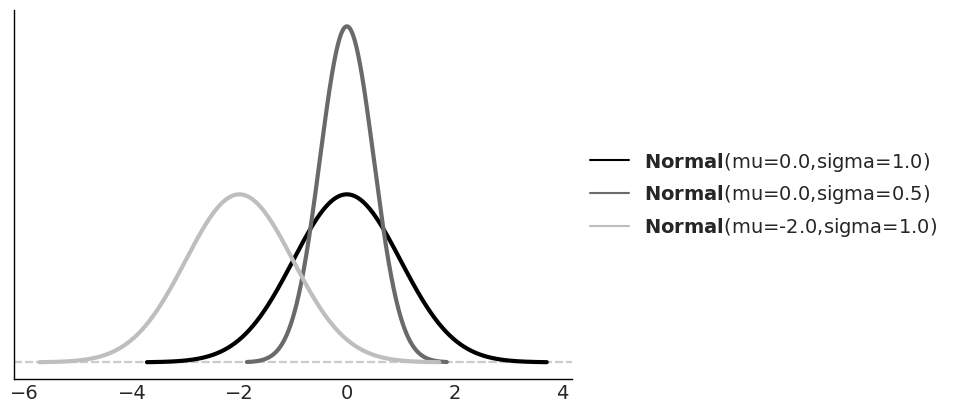

In [92]:
mus = [0., 0., -2.]
sigmas = [1, 0.5, 1]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]
plt.savefig("../fig/gaussian_pdf.png")

0.4772498680518208

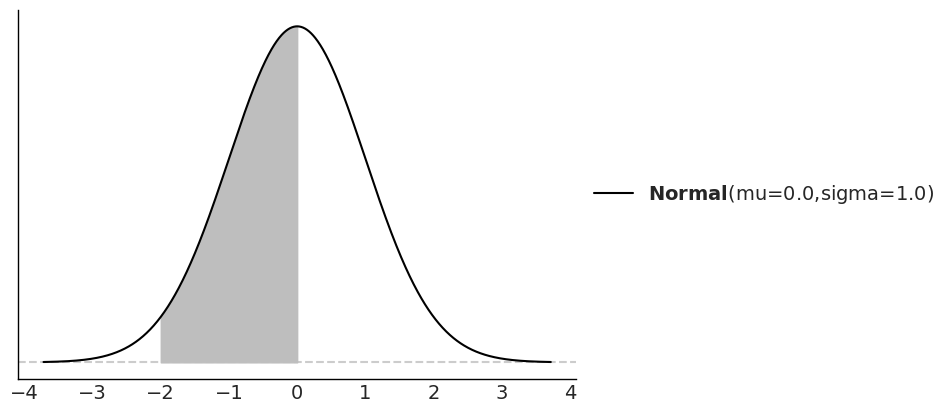

In [117]:
dist = pz.Normal(0, 1)
ax = dist.plot_pdf()
x_s = np.linspace(-2, 0)
ax.fill_between(x_s, dist.pdf(x_s), color="C2")
plt.savefig("../fig/gauss_prob.png")
dist.cdf(0) - dist.cdf(-2)


In [3]:
dist = pz.Normal(0, 1)
a = -2
b = 0
num = 10
x_s = np.linspace(a, b, num)
base = (b-a)/num
np.sum(dist.pdf(x_s) * base)

0.4744186055196588

In [20]:
dist.pdf(0.5), dist.pdf(0.4)

(0.35206532676429947, 0.36827014030332333)

In [23]:
values = dist.rvs(1000000)
np.mean([(0.4  > values)  & (values < 0.6)]), np.mean([(0.3  > values)  & (values < 0.5)])

(0.655341, 0.618115)

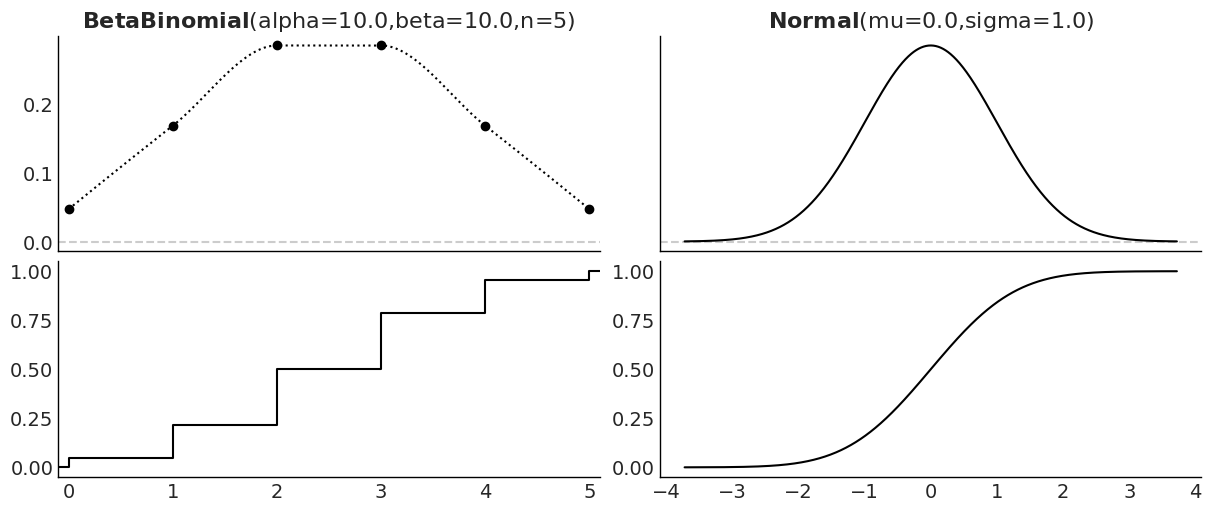

In [41]:
_, ax = plt.subplots(2, 2, figsize=(12, 5), sharex="col")
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_pdf(ax=ax[0, 0], legend="title")
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_cdf(ax=ax[1, 0], legend=None)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 1], legend="title")
pz.Normal(0, 1).plot_cdf(ax=ax[1, 1], legend=None)
plt.savefig("../fig/cdf_pdf.png", bbox_inches='tight')

pz.BetaBinomial(alpha=10, beta=10, n=6)


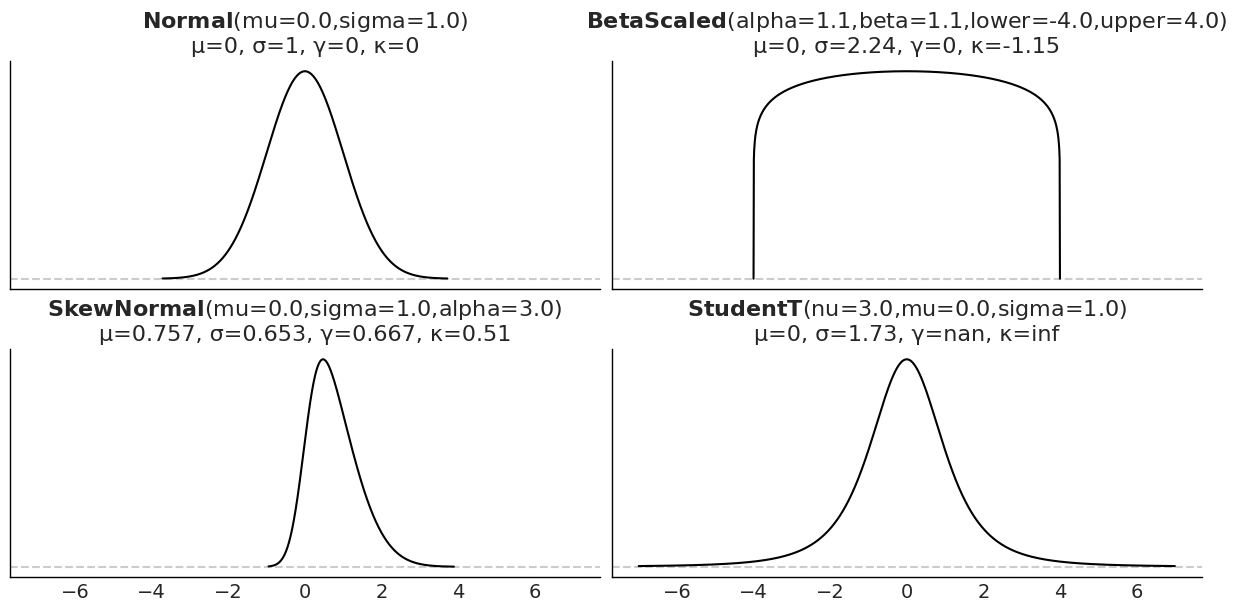

In [89]:
_, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 0], moments=["m", "d", "s", "k"], legend="title")
pz.BetaScaled(1.1, 1.1, -4, 4).plot_pdf(ax=ax[0, 1], moments=["m", "d", "s", "k"], legend="title")
pz.SkewNormal(0, 1, 3).plot_pdf(ax=ax[1, 0], moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(ax=ax[1, 1], moments=["m", "d", "s", "k"], legend="title", support=(-7, 7))
plt.savefig("../fig/moments.png", bbox_inches='tight')

<AxesSubplot:>

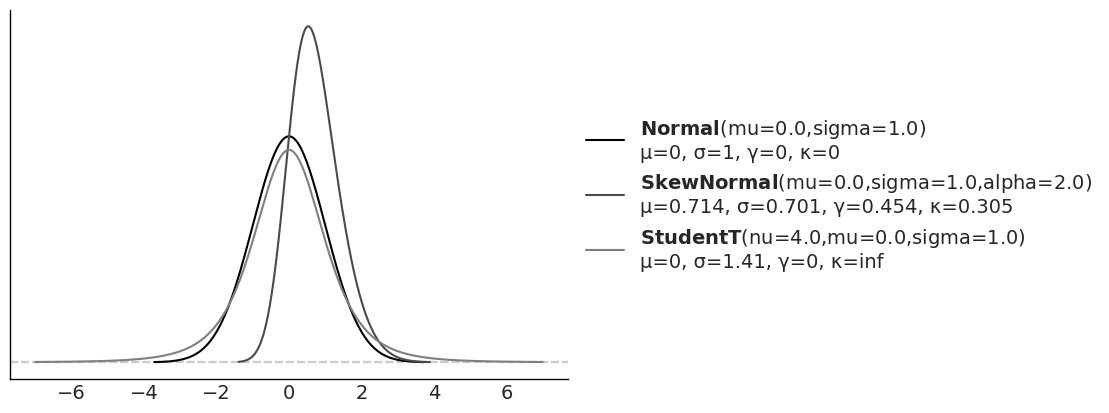

In [78]:
pz.Normal(0, 1).plot_pdf(moments=["m", "d", "s", "k"])
pz.SkewNormal(0, 1, 2).plot_pdf(moments=["m", "d", "s", "k"])
pz.StudentT(4, 0, 1).plot_pdf(moments=["m", "d", "s", "k"], support=(-7, 7))

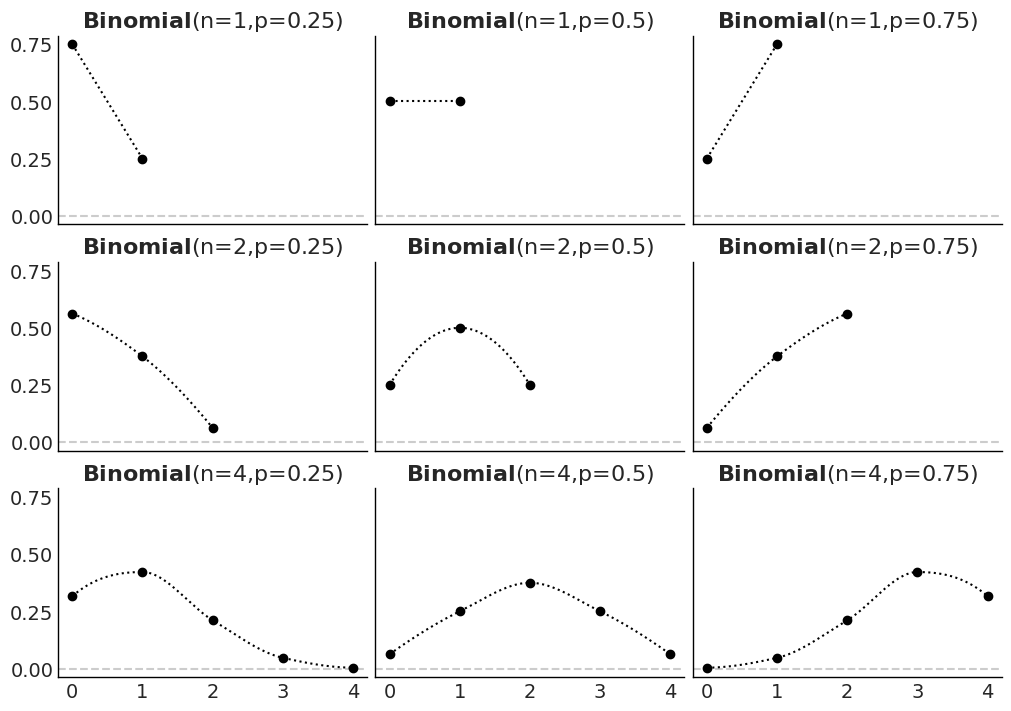

In [15]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, n in enumerate(n_params):
    for j, p in enumerate(p_params):
        pz.Binomial(n, p).plot_pdf(legend="title", ax=axes[i, j])
plt.savefig("../fig/binomial_distribution.png")